In [86]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [87]:
tf.reset_default_graph()

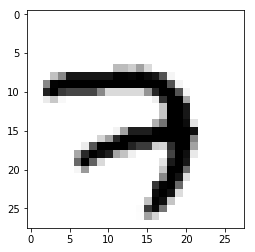

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist.train.images[0].reshape(28,28), cmap = 'Greys')

In [89]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

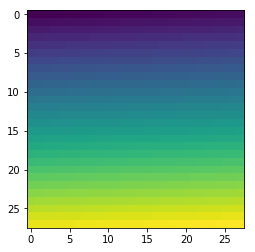

In [90]:
import numpy as np
imagem1 = np.arange(0,784).reshape(28,28)
plt.imshow(imagem1)

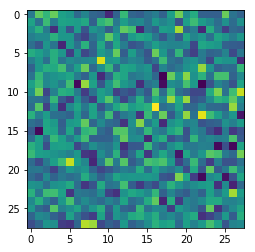

In [91]:
imagem2 = np.random.normal(size = 784).reshape(28,28)
plt.imshow(imagem2)

In [92]:
ruido_ph = tf.placeholder(tf.float32, [None, 100])

In [93]:
def gerador(ruido, reuse = None):
    with tf.variable_scope('gerador', reuse = reuse):
        # 100 -> 128 -> 128 -> 784
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = ruido, units = 128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))
        camada_saida = tf.layers.dense(inputs = camada_oculta2, units = 784, activation = tf.nn.tanh)
        return camada_saida

In [94]:
imagens_reais_ph = tf.placeholder(tf.float32, [None, 784])

In [95]:
def discriminador(X, reuse = None):
    with tf.variable_scope('discriminador', reuse = reuse):
        # 784 -> 128 -> 128 -> 1
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = X, units = 128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))
        logits = tf.layers.dense(camada_oculta2, units = 1)
        return logits

In [96]:
logits_imagens_reais = discriminador(imagens_reais_ph)
logits_imagens_ruido = discriminador(gerador(ruido_ph), reuse = True)

erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_reais,
                                                                                labels = tf.ones_like(logits_imagens_reais) * (0.9)))
erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                                 labels = tf.zeros_like(logits_imagens_ruido)))
erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                     labels = tf.ones_like(logits_imagens_ruido)))


In [97]:
variaveis = tf.trainable_variables()
variaveis

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [98]:
variaveis_discriminador = [v for v in variaveis if 'discriminador' in v.name]
print([v.name for v in variaveis_discriminador])

['discriminador/dense/kernel:0', 'discriminador/dense/bias:0', 'discriminador/dense_1/kernel:0', 'discriminador/dense_1/bias:0', 'discriminador/dense_2/kernel:0', 'discriminador/dense_2/bias:0']


In [99]:
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]
print([v.name for v in variaveis_gerador])

['gerador/dense/kernel:0', 'gerador/dense/bias:0', 'gerador/dense_1/kernel:0', 'gerador/dense_1/bias:0', 'gerador/dense_2/kernel:0', 'gerador/dense_2/bias:0']


In [100]:
treinamento_discriminador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_discriminador,
                                                                                  var_list = variaveis_discriminador)
treinamento_gerador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_gerador,
                                                                            var_list = variaveis_gerador)

In [101]:
batch_size = 100
amostras_teste = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #ruido_teste = np.random.uniform(-1, 1, size = (1,100))
    #amostra = sess.run(gerador(ruido_ph, True), feed_dict = {ruido_ph: ruido_teste})
    
    #batch = mnist.train.next_batch(100)
    #imagens_batch = batch[0].reshape((100, 784))
    #imagens_batch = imagens_batch * 2 - 1
    #r = sess.run(discriminador(imagens_reais_ph, True), feed_dict = {imagens_reais_ph: imagens_batch})
    #r2 = sess.run(tf.nn.sigmoid(r))
    #ex = tf.constant([[1,2],[3,4]])
    #print(sess.run(tf.ones_like(ex)))
    
    for epoca in range(300):
        numero_batches = mnist.train.num_examples // batch_size
        for i in range(numero_batches):
            batch = mnist.train.next_batch(batch_size)
            imagens_batch = batch[0].reshape((100, 784))
            imagens_batch = imagens_batch * 2 - 1
            
            batch_ruido = np.random.uniform(-1, 1, size = (batch_size, 100))
            
            _, custod = sess.run([treinamento_discriminador, erro_discriminador], 
                                 feed_dict = {imagens_reais_ph: imagens_batch, ruido_ph: batch_ruido})
            _, custog = sess.run([treinamento_gerador, erro_gerador], feed_dict = {ruido_ph: batch_ruido})
            
        print('época: ' + str(epoca + 1) + ' erro D: ' + str(custod) + ' erro G: ' + str(custog))
        
        ruido_teste = np.random.uniform(-1, 1, size = (1, 100))
        imagem_gerada = sess.run(gerador(ruido_ph, reuse = True), feed_dict = {ruido_ph: ruido_teste})
        amostras_teste.append(imagem_gerada)
            
            

época: 1 erro D: 0.4227343 erro G: 4.0590324
época: 2 erro D: 1.2535803 erro G: 3.3522596
época: 3 erro D: 0.6547816 erro G: 3.1205695
época: 4 erro D: 1.4697287 erro G: 2.1687567
época: 5 erro D: 1.1125138 erro G: 2.166302
época: 6 erro D: 1.5636008 erro G: 1.9671075
época: 7 erro D: 1.2186203 erro G: 2.392889
época: 8 erro D: 0.7397715 erro G: 3.0147495
época: 9 erro D: 0.8538704 erro G: 6.0113235
época: 10 erro D: 0.56731033 erro G: 2.781017
época: 11 erro D: 2.6560214 erro G: 1.5064932
época: 12 erro D: 1.5636152 erro G: 1.1944884
época: 13 erro D: 2.3470087 erro G: 1.3799987
época: 14 erro D: 1.5478492 erro G: 1.8759298
época: 15 erro D: 1.0910221 erro G: 1.9010828
época: 16 erro D: 0.85499275 erro G: 1.9217497
época: 17 erro D: 0.9217727 erro G: 2.990436
época: 18 erro D: 0.72026265 erro G: 2.3087845
época: 19 erro D: 0.76443815 erro G: 2.4764218
época: 20 erro D: 0.85567784 erro G: 3.7987165
época: 21 erro D: 1.0924884 erro G: 3.3112648
época: 22 erro D: 0.664887 erro G: 4.36945

época: 178 erro D: 1.1666789 erro G: 1.2095056
época: 179 erro D: 1.1734679 erro G: 1.4231132
época: 180 erro D: 1.3096328 erro G: 1.0900098
época: 181 erro D: 1.2113571 erro G: 1.0688442
época: 182 erro D: 1.3555565 erro G: 1.4194261
época: 183 erro D: 1.0451386 erro G: 1.57426
época: 184 erro D: 1.1772733 erro G: 1.0922413
época: 185 erro D: 1.2532234 erro G: 1.2710859
época: 186 erro D: 1.3567214 erro G: 0.9850888
época: 187 erro D: 1.1991489 erro G: 1.3089914
época: 188 erro D: 1.0674837 erro G: 1.2312055
época: 189 erro D: 1.280088 erro G: 0.9991741
época: 190 erro D: 1.3073921 erro G: 1.1238006
época: 191 erro D: 1.075016 erro G: 1.7228433
época: 192 erro D: 1.1856182 erro G: 1.1637918
época: 193 erro D: 1.4023719 erro G: 1.1146542
época: 194 erro D: 1.2394438 erro G: 0.96289253
época: 195 erro D: 1.3607548 erro G: 1.1066427
época: 196 erro D: 1.3032496 erro G: 1.0250142
época: 197 erro D: 1.2366152 erro G: 1.0632219
época: 198 erro D: 1.0981591 erro G: 1.4118474
época: 199 erro 

In [102]:
amostra.shape

(1, 784)

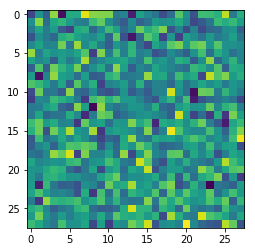

In [103]:
plt.imshow(amostra.reshape(28,28))

In [104]:
batch = mnist.train.next_batch(100)
batch[0].shape
imagens_batch = batch[0].reshape((100, 784))

In [105]:
imagens_batch.shape

(100, 784)

In [106]:
imagens_batch[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [107]:
imagens_batch = imagens_batch * 2 - 1
imagens_batch[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [108]:
r.shape

(100, 1)

In [109]:
r

array([[ 7.7287775e-01],
       [ 2.0352206e-01],
       [-4.6529287e-01],
       [-2.0565715e-01],
       [ 4.8481011e-01],
       [-5.5246913e-01],
       [-1.4859867e-01],
       [ 4.2620301e-02],
       [ 1.5588570e-01],
       [-6.8359149e-01],
       [-6.2090391e-01],
       [-2.2046340e-01],
       [ 1.3528022e-01],
       [ 9.5793158e-01],
       [ 1.5473366e-03],
       [-1.4694136e-01],
       [ 5.2294707e-01],
       [-1.4935854e-01],
       [-1.6393599e-01],
       [-2.5308913e-01],
       [-7.3158592e-02],
       [-1.2129104e-01],
       [ 5.9305441e-01],
       [ 6.4165664e-01],
       [-1.1095625e-01],
       [ 6.8644583e-01],
       [ 2.0009926e-01],
       [-1.9532144e-01],
       [-4.3474182e-01],
       [ 3.4561610e-01],
       [ 7.4803042e-01],
       [-6.1274242e-01],
       [-7.6522595e-01],
       [ 6.0603821e-01],
       [-4.3495679e-01],
       [-2.5090030e-01],
       [ 3.4371167e-02],
       [-6.2407458e-01],
       [-5.4536235e-01],
       [-7.6519102e-01],


In [110]:
r2

array([[0.68414307],
       [0.5507056 ],
       [0.38573095],
       [0.44876614],
       [0.6188831 ],
       [0.36529174],
       [0.46291855],
       [0.51065344],
       [0.5388927 ],
       [0.3354602 ],
       [0.3495759 ],
       [0.44510633],
       [0.53376853],
       [0.72270745],
       [0.50038683],
       [0.4633306 ],
       [0.62783664],
       [0.46272963],
       [0.45910758],
       [0.43706328],
       [0.48171854],
       [0.46971434],
       [0.6440657 ],
       [0.6551278 ],
       [0.47228935],
       [0.6651758 ],
       [0.54985857],
       [0.4513243 ],
       [0.39299458],
       [0.58555406],
       [0.6787494 ],
       [0.35143384],
       [0.31751275],
       [0.64703655],
       [0.39294332],
       [0.4376019 ],
       [0.50859195],
       [0.34885532],
       [0.36694103],
       [0.3175203 ],
       [0.48679686],
       [0.46588093],
       [0.43468457],
       [0.60124767],
       [0.5356278 ],
       [0.42185938],
       [0.3583226 ],
       [0.492

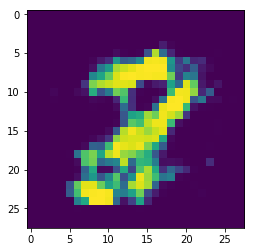

In [119]:
plt.imshow(amostras_teste[299].reshape(28,28))